In [15]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import zipfile
import pathlib
import numpy as np
import os
import matplotlib.image as mpimg
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
zip_ref = zipfile.ZipFile("101_food_classes_10_percent.zip", "r")
zip_ref.extractall()
zip_ref.close()

KeyboardInterrupt: 

In [17]:
main_dir="101_food_classes_10_percent"
data_dir = pathlib.Path("101_food_classes_10_percent/train/")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['apple_pie' 'baby_back_ribs' 'baklava' 'beef_carpaccio' 'beef_tartare'
 'beet_salad' 'beignets' 'bibimbap' 'bread_pudding' 'breakfast_burrito'
 'bruschetta' 'caesar_salad' 'cannoli' 'caprese_salad' 'carrot_cake'
 'ceviche' 'cheese_plate' 'cheesecake' 'chicken_curry'
 'chicken_quesadilla' 'chicken_wings' 'chocolate_cake' 'chocolate_mousse'
 'churros' 'clam_chowder' 'club_sandwich' 'crab_cakes' 'creme_brulee'
 'croque_madame' 'cup_cakes' 'deviled_eggs' 'donuts' 'dumplings' 'edamame'
 'eggs_benedict' 'escargots' 'falafel' 'filet_mignon' 'fish_and_chips'
 'foie_gras' 'french_fries' 'french_onion_soup' 'french_toast'
 'fried_calamari' 'fried_rice' 'frozen_yogurt' 'garlic_bread' 'gnocchi'
 'greek_salad' 'grilled_cheese_sandwich' 'grilled_salmon' 'guacamole'
 'gyoza' 'hamburger' 'hot_and_sour_soup' 'hot_dog' 'huevos_rancheros'
 'hummus' 'ice_cream' 'lasagna' 'lobster_bisque' 'lobster_roll_sandwich'
 'macaroni_and_cheese' 'macarons' 'miso_soup' 'mussels' 'nachos'
 'omelette' 'onion_rings' 'oy

In [29]:
n = 21 #Варіант

l = []
arr = (n - 1, n + 29, n + 59)
for i in range(len(class_names)):
    if i in arr:
        l.append(class_names[i])

print(l)

['chicken_wings', 'grilled_salmon', 'pulled_pork_sandwich']


Image shape: (512, 512, 3)


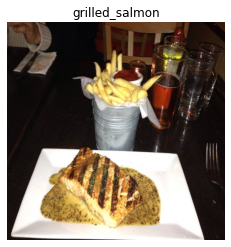

In [31]:
def view_random_image(target_dir, target_class):
  target_folder = target_dir+target_class

  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")

  return img

img = view_random_image(target_dir="101_food_classes_10_percent/train/",
                        target_class="grilled_salmon")

In [32]:
img

array([[[ 84,  31,  23],
        [ 87,  37,  28],
        [ 90,  42,  32],
        ...,
        [ 50,  28,  14],
        [ 50,  28,  14],
        [ 50,  28,  14]],

       [[ 90,  37,  29],
        [ 93,  43,  34],
        [ 96,  48,  38],
        ...,
        [ 50,  28,  14],
        [ 50,  28,  14],
        [ 50,  28,  14]],

       [[ 95,  45,  36],
        [ 99,  51,  39],
        [102,  54,  42],
        ...,
        [ 47,  28,  13],
        [ 48,  29,  14],
        [ 50,  28,  14]],

       ...,

       [[ 25,  18,  12],
        [ 27,  20,  14],
        [ 28,  21,  15],
        ...,
        [ 15,   9,   9],
        [ 14,   8,   8],
        [ 15,   9,   9]],

       [[ 25,  18,  12],
        [ 27,  20,  14],
        [ 27,  20,  14],
        ...,
        [ 15,   9,   9],
        [ 14,   8,   8],
        [ 16,  10,  10]],

       [[ 24,  17,   9],
        [ 24,  17,  11],
        [ 24,  17,  11],
        ...,
        [ 15,   9,   9],
        [ 14,   8,   8],
        [ 17,  11,  11]]

In [33]:
img/255

array([[[0.32941176, 0.12156863, 0.09019608],
        [0.34117647, 0.14509804, 0.10980392],
        [0.35294118, 0.16470588, 0.1254902 ],
        ...,
        [0.19607843, 0.10980392, 0.05490196],
        [0.19607843, 0.10980392, 0.05490196],
        [0.19607843, 0.10980392, 0.05490196]],

       [[0.35294118, 0.14509804, 0.11372549],
        [0.36470588, 0.16862745, 0.13333333],
        [0.37647059, 0.18823529, 0.14901961],
        ...,
        [0.19607843, 0.10980392, 0.05490196],
        [0.19607843, 0.10980392, 0.05490196],
        [0.19607843, 0.10980392, 0.05490196]],

       [[0.37254902, 0.17647059, 0.14117647],
        [0.38823529, 0.2       , 0.15294118],
        [0.4       , 0.21176471, 0.16470588],
        ...,
        [0.18431373, 0.10980392, 0.05098039],
        [0.18823529, 0.11372549, 0.05490196],
        [0.19607843, 0.10980392, 0.05490196]],

       ...,

       [[0.09803922, 0.07058824, 0.04705882],
        [0.10588235, 0.07843137, 0.05490196],
        [0.10980392, 0

In [37]:
tf.random.set_seed(19)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = main_dir+"/train/"
test_dir = main_dir+"/test/"

train_data = train_datagen.flow_from_directory(train_dir,
    batch_size=32,
    target_size=(224, 224),
    class_mode="sparse",
    seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
    batch_size=32,
    target_size=(224, 224),
    class_mode="sparse",
    seed=42)



model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
    kernel_size=3,
    activation="relu", 
    input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
    padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="softmax")
])

model_1.compile(loss="binary_crossentropy",
  optimizer=tf.keras.optimizers.Adam(),
  metrics=["accuracy"])

history_1 = model_1.fit(train_data,
    epochs=2,
    steps_per_epoch=len(train_data),
    validation_data=valid_data,
    validation_steps=len(valid_data))

Found 225 images belonging to 3 classes.
Found 750 images belonging to 3 classes.
Epoch 1/2
8/8 [==============================] - 26s 3s/step - loss: -0.2120 - accuracy: 0.3333 - val_loss: -0.8428 - val_accuracy: 0.3333
Epoch 2/2
8/8 [==============================] - 19s 2s/step - loss: -1.2730 - accuracy: 0.3333 - val_loss: -3.6958 - val_accuracy: 0.3333


In [38]:
model_1.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_13 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_15 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

<AxesSubplot:title={'center':'History ins_model'}, xlabel='epochs', ylabel='loss'>

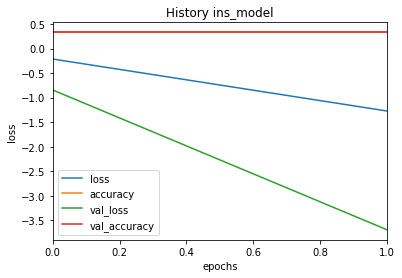

In [39]:

pd.DataFrame(history_1.history).plot(xlabel="epochs", 
ylabel="loss",title="History ins_model", xlim=(0,1))

In [40]:

def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

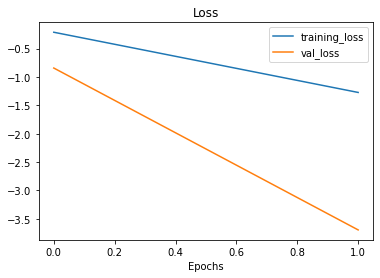

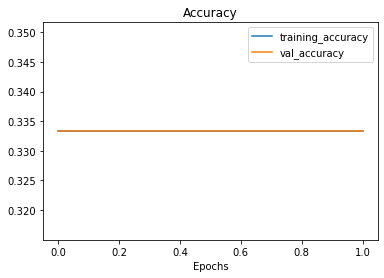

In [41]:
plot_loss_curves(history_1)

In [42]:
model_1.save('model.h5')